In [17]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Eowin2210/Estadistica-inferencial/refs/heads/main/iris.csv')
df.dropna(inplace=True)
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


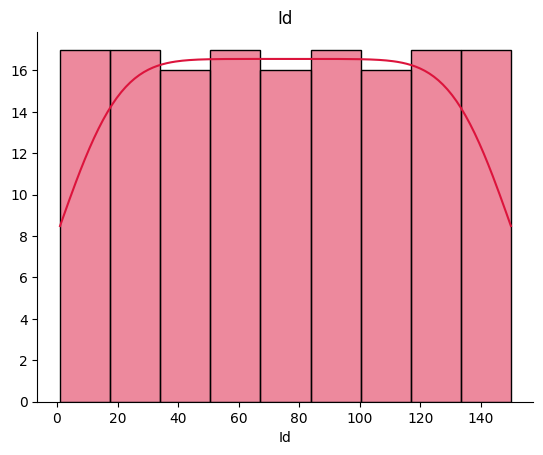

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Id'], kde = True, color = 'crimson')

plt.xlabel('Id')
plt.ylabel('')
plt.title('Id')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

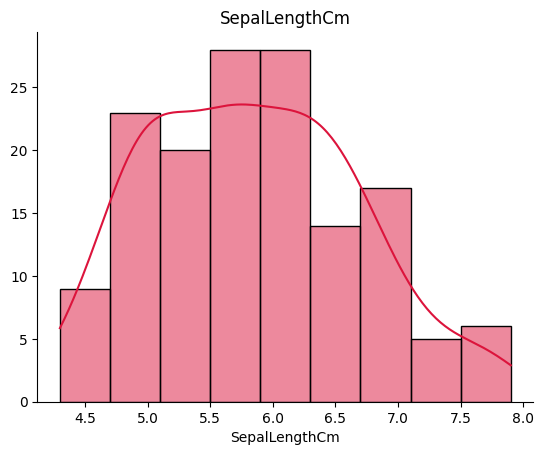

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['SepalLengthCm'], kde = True, color = 'crimson')

plt.xlabel('SepalLengthCm')
plt.ylabel('')
plt.title('SepalLengthCm')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

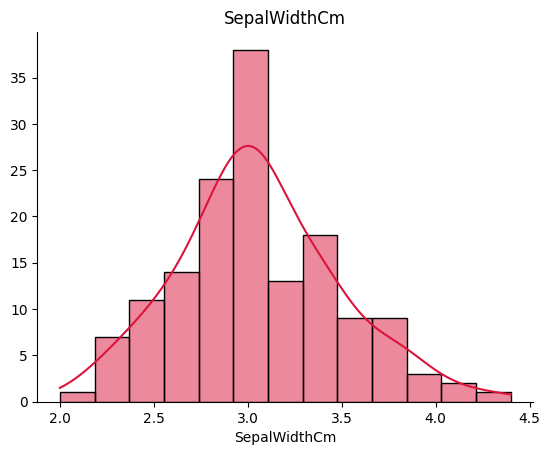

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['SepalWidthCm'], kde = True, color = 'crimson')

plt.xlabel('SepalWidthCm')
plt.ylabel('')
plt.title('SepalWidthCm')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

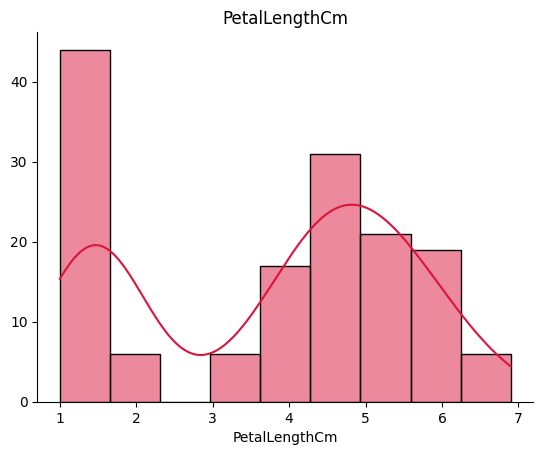

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['PetalLengthCm'], kde = True, color = 'crimson')

plt.xlabel('PetalLengthCm')
plt.ylabel('')
plt.title('PetalLengthCm')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [56]:
df = df.loc[df['PetalLengthCm'] != 0, :]
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [23]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
niveles = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
df['Species'] = df['Species'].map(niveles)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


Text(0.5, 1.0, 'Matriz De Correlacion')

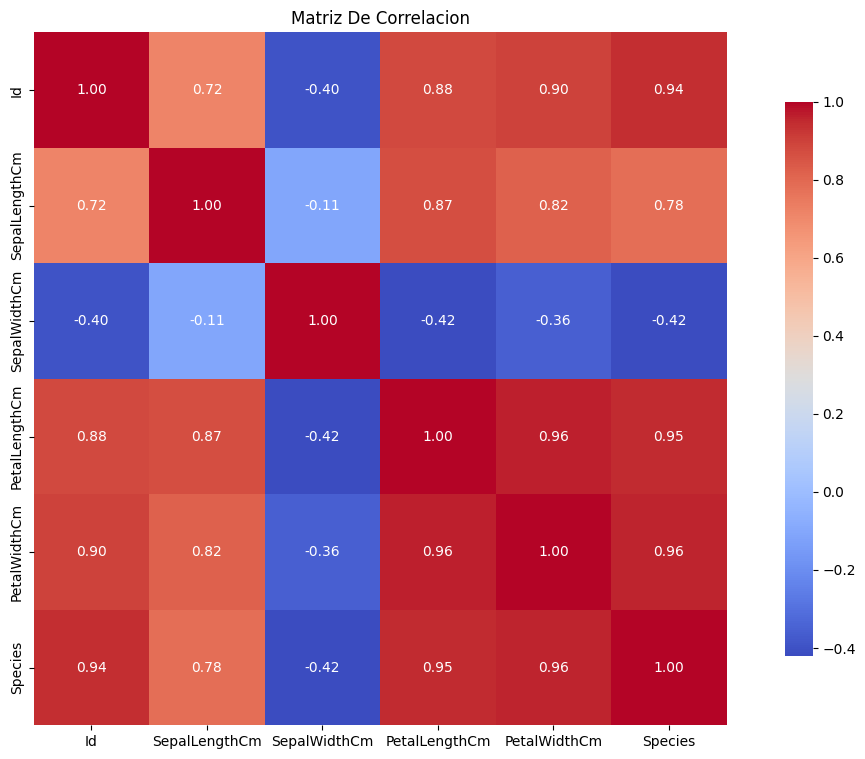

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion = df.corr()
plt.figure(figsize = (15,9))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = '0.2f', square = True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz De Correlacion')

 Variables más correlacionadas con la variable dependiente Species:
PetalWidthCm → 0.96 

PetalLengthCm → 0.95 

SepalLengthCm → 0.78 (alta, pero menor que las anteriores)

SepalWidthCm → -0.42 (correlación negativa y más débil)

Las variables PetalWidthCm y PetalLengthCm tienen una fuerte correlación positiva con Species y además fueron significativas estadísticamente.

PetalLengthCm y PetalWidthCm tienen una correlación de 0.96, lo cual es muy alto.

Esto sugiere alta multicolinealidad, lo que puede causar:

Inestabilidad en los coeficientes del modelo.

Dificultad para interpretar efectos individuales.

Coeficiente de determinacion:  0.9467


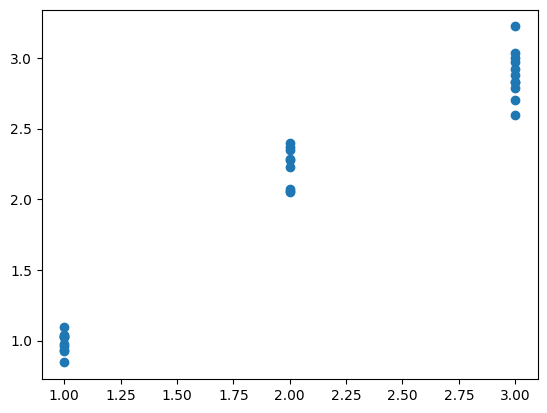

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = df['Species']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()


Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinacion: {r2: 0.4f}')


Un R2 = 0.9467 significa que el 94.67% de la variabilidad de la variable dependiente es explicada por el modelo, es decir, por todas las variables independientes incluidas en la regresión.

Esto sugiere que:

El modelo tiene un alto poder explicativo.

Las variables seleccionadas conjuntamente son muy buenas para predecir o explicar el comportamiento de la variable dependiente.

Solo el 5.33% de la variación no es explicada por el modelo (posiblemente atribuible a factores no considerados o error aleatorio).

In [27]:
from statsmodels.formula.api import ols

moedo_2 = ols(formula = 'Species ~ SepalLengthCm + SepalWidthCm + PetalLengthCm + PetalWidthCm', data = df).fit()
tabla_anova = sm.stats.anova_lm(moedo_2, typ = 2)
tabla_anova

,sum_sq,df,F,PR(>F)
SepalLengthCm,0.173224,1.0,3.610002,5.941834e-02
SepalWidthCm,0.026120,1.0,0.544340,4.618319e-01
PetalLengthCm,0.761299,1.0,15.865494,1.072453e-04
PetalWidthCm,1.999777,1.0,41.675416,1.519620e-09
Residual,6.957763,145.0,NaN,NaN


PetalWidthCm y PetalLengthCm son altamente significativas, ya que sus p-valores son muy pequeños (menores a 0.05), especialmente PetalWidthCm, con un valor prácticamente cero. Esto indica que estas variables tienen un efecto estadísticamente significativo sobre la variable dependiente (no sabemos cuál es, pero asumo algo como "Species" o una variable numérica relacionada con flores).

SepalLengthCm tiene un p-valor de 0.059, lo cual está muy cerca del umbral de significancia típica (0.05). Podría considerarse marginalmente significativa, y podrías explorar si mejora el modelo con o sin ella.

SepalWidthCm claramente no es significativa (p-valor = 0.46). Su inclusión podría no estar aportando mucho al modelo.


In [28]:
b0, b1, b2, b3, b4 = modelo.params

Fun = lambda X1, X2, X3, X4 : b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4

Fun(4.9, 3.1, 3.1, 0.2)

1.3939865392583142

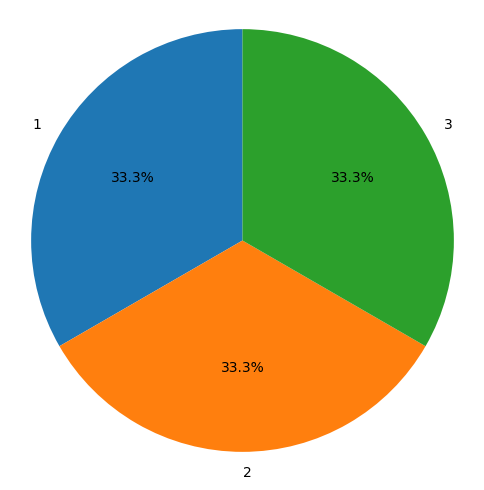

In [30]:
conteo = df['Species'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(conteo, labels=conteo.index.map(str), autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [31]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm', 'PetalLengthCm']]
Y = df['Species']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Predecir
Y_pred = rf.predict(X_test)

# Evaluar
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       0.96      1.00      0.98        23
           3       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [60]:
from sklearn.ensemble import RandomForestClassifier

importancia = pd.Series(rf.feature_importances_, index=X.columns)
print(importancia.sort_values(ascending=False))

PetalWidthCm     0.442367
PetalLengthCm    0.414339
SepalLengthCm    0.108965
SepalWidthCm     0.034329
dtype: float64


In [61]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo
modelo_dtc = DecisionTreeClassifier(random_state=42)
modelo_dtc.fit(X_train, Y_train)

# Predecir
Y_pred = modelo_dtc.predict(X_test)

# Evaluar
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       0.91      0.87      0.89        23
           3       0.88      0.91      0.89        23

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75

